## Setup

In [16]:
import os, importlib

import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

import tensorflow as tf

print('TensorFlow version: %s' % tf.__version__)

TensorFlow version: 2.7.0


## Data description

* the data contains a set of three 2D images, called projections, and denopted U, V, W. One says "a U projection".
* the imges are not rectangular - the shape is (512,92)
* the preprocessing function `iof.preprocessProjections(item, projection=0)` returns images for a single projection - thin case a projectio n 0 corresponding to "U"

## Analysis objectives:

* an ultiumate objective is to train a model that will recognise "three prong" events like event number 636 in the examples below.
* the main issue is that there is no labeled data

Data shape is:  (512, 92, 1)


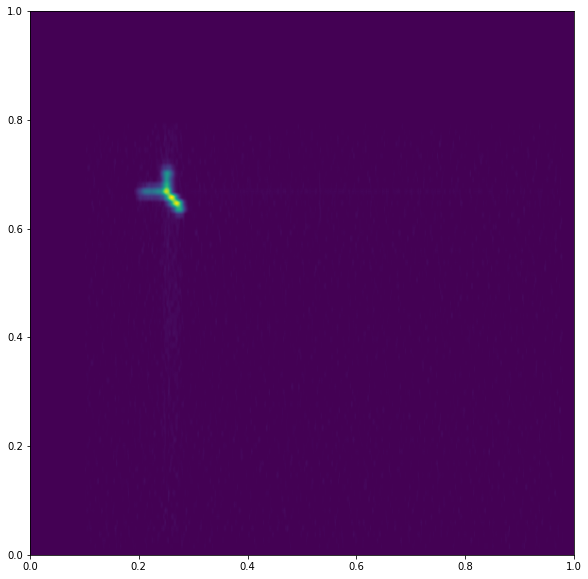

In [26]:
import io_functions as iof
importlib.reload(iof)

fileNames = ["UVWProjections_2018-06-19T15:13:33.941_0008.tfrecords"]
dataset = iof.readTFRecordFile(fileNames)
dataset = dataset.map(lambda item: iof.preprocessProjections(item, projection=0))

imageRange = [0,1, 0,1]  

for data in dataset.skip(636).take(1):
    image = tf.broadcast_to(data, (512,92,3))
    image = tf.cast(255*image, dtype=tf.uint8)
    image = image.numpy()
    
    print("Data shape is: ",data.shape)    
    
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    ig, ax = plt.subplots(1,1, figsize=(10, 10))
    ax.imshow(np.transpose(image) ,extent=imageRange, origin='lower')